# MOT LOADING DYNAMICS

In [80]:
import datarun_worksforsizeVSnum_new as dr
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [45]:
numtrials=16
d = dr.Experiment(
    vlist=[10,20,40,60,80],
    idx_start = 164,
    datapath = os.path.join(os.getcwd(),'load_time'),
    numtrials = numtrials,
    mask=0.1
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun_worksforsizeVSnum_new.py:163: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun_worksforsizeVSnum_new.py:163: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


on 30: skip image 194                                                                                                   
on 65: skip image 229                                                                                                   
|████████████████████████████████████████| 80/80 [100%] in 2:03.0 (0.65/s)                                              


# LOADING DYNAMICS

In [46]:
print(len(d.data))
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))
# N_list = d.structure_data(lambda d: d.atom_number())
N_list={time:[] for time in d.vlist}
for datum in d.data:
    N_list[datum.value].append(datum.atom_number_px_sum())
N_list


78


{10: [3243842.2109956574,
  1625836.1925215095,
  2663785.332169243,
  3626705.4053465673,
  4332066.771243641,
  2797184.9280565376,
  2839147.98096822,
  1839042.5888033526,
  4088146.5368896294,
  2638133.3541954057,
  3657026.1889604917,
  2237155.611196794,
  1816186.8971308607,
  3285418.220279035],
 20: [7581522.667318819,
  7485715.979756128,
  9429119.374509996,
  6936849.013518971,
  6130180.919028003,
  9593769.350854196,
  7751283.272916757,
  6598573.963444408,
  6608024.592091711,
  6305598.588802186,
  7901295.752991068,
  6817876.636448033,
  3401098.915924622,
  6192849.236578766,
  7006807.768216153,
  5071217.333523728],
 40: [13582543.219464302,
  12265024.318458775,
  11330605.710656708,
  11485831.654124724,
  11089210.156205786,
  11143541.361885363,
  6325506.117389499,
  12622091.96421478,
  8574284.884269774,
  11772055.606103996,
  9937693.566285482,
  10689449.055056436,
  12147542.344197484,
  9513750.945376547,
  6746765.142386574,
  8148609.851773083],
 6

[4.33987593e+05 3.31466891e-02]
[8.76884371e+04 1.10204726e-02]


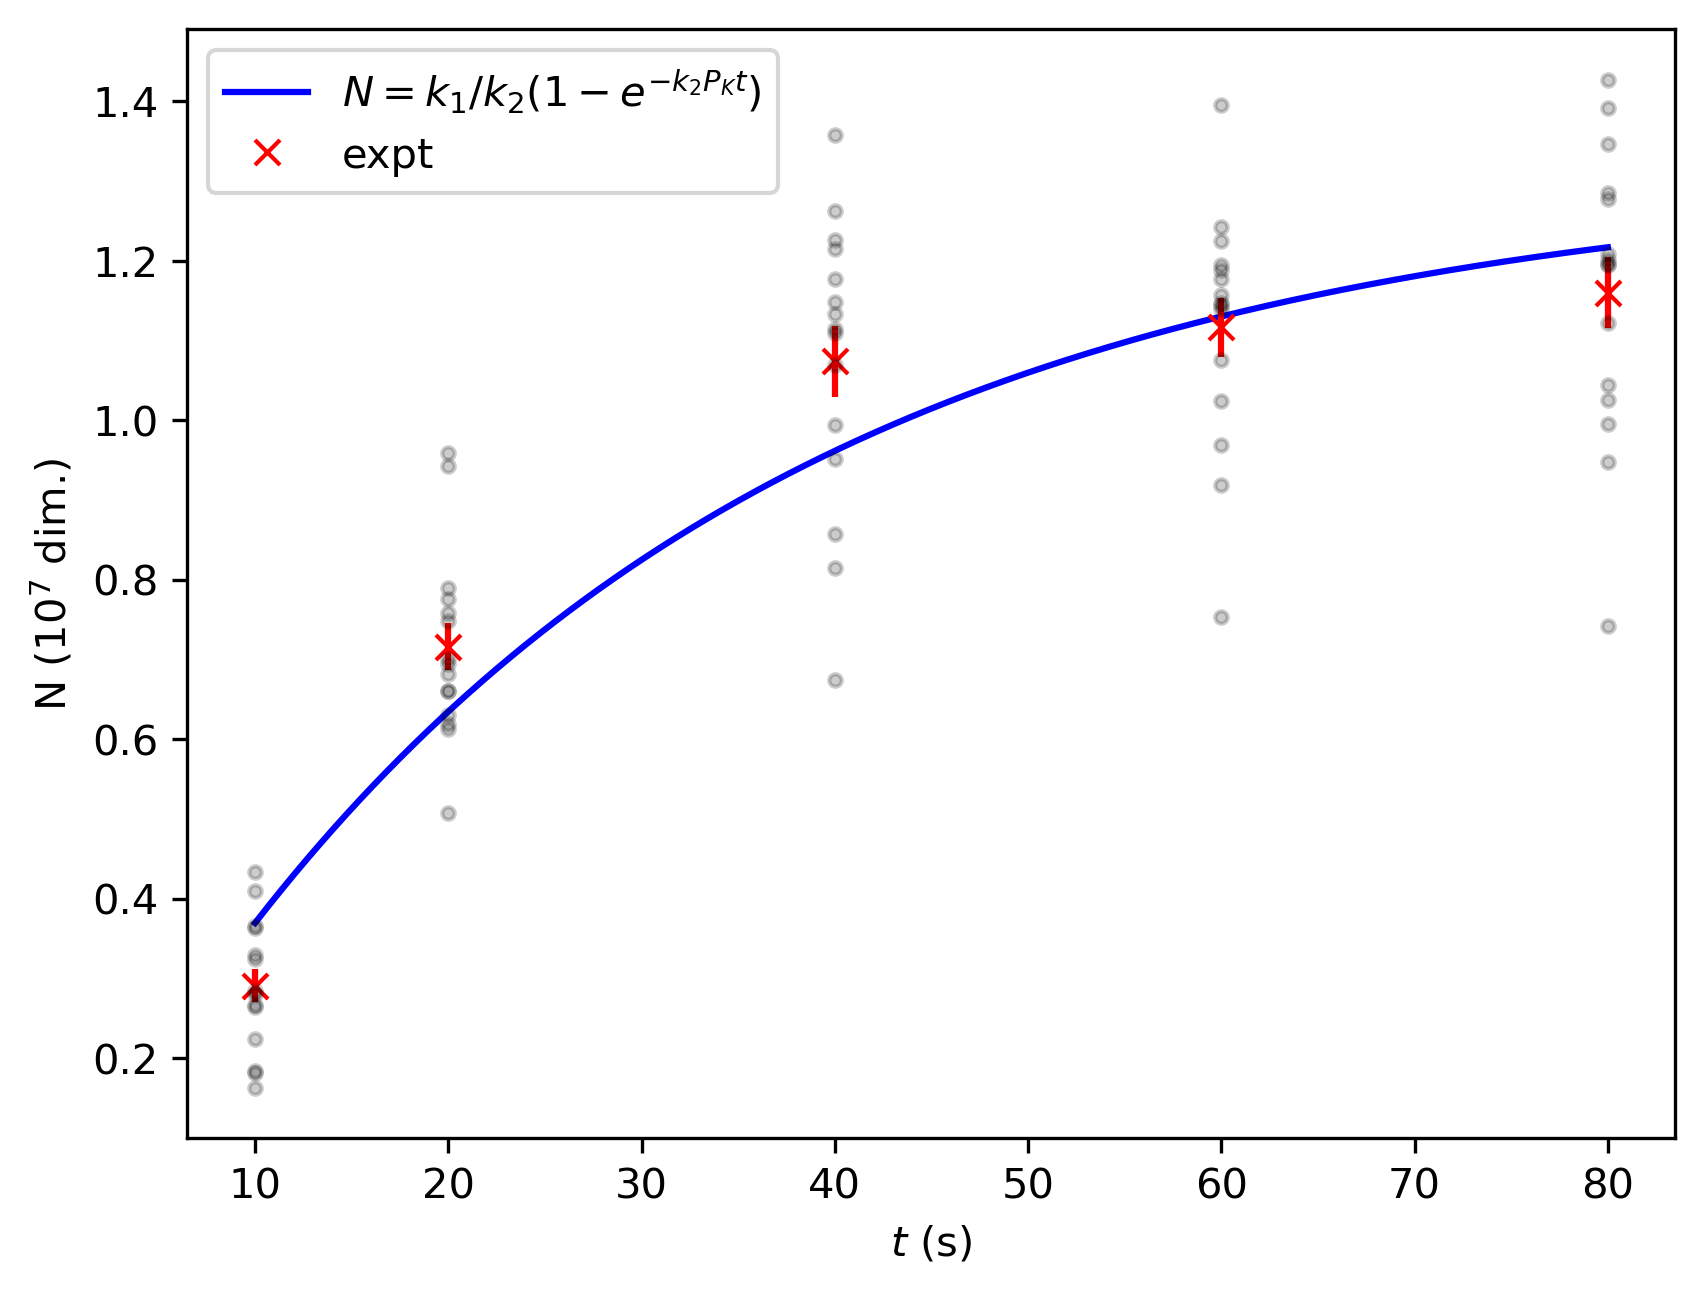

In [39]:
num_plot_scaling=10**7
N_list_copy=N_list.copy()
stats_dict={key:(np.mean(N_list_copy[key].copy()),np.std(N_list_copy[key].copy())) for key in N_list_copy.keys()}
for key in N_list_copy.keys():
    # copy_list=N_list[key].copy()
    for i in range(len(N_list_copy[key])):
        if abs(N_list_copy[key][i]-stats_dict[key][0])>2*stats_dict[key][1]:
            N_list_copy[key][i]=np.nan
y_plot=np.array([np.nanmean(n) for n in N_list_copy.values()])
x_plot=list(N_list_copy.keys())
popt,pcov=curve_fit(loading_dyn,x_plot,y_plot,(6e5,4.5e-2),sigma=[np.nanstd(N_list_copy[key]) for key in x_plot],absolute_sigma=True,bounds=([1e5,0],[np.inf,np.inf]))
print(popt)
print(np.sqrt(np.diag(pcov)))
xfit=np.linspace(min(x_plot),max(x_plot),num_plot_scaling)
yfit=loading_dyn(xfit,*popt)
# yfit=loading_dyn(xfit,6e5,4.5e-2)
fig,ax=plt.subplots(dpi=300)
ax.plot(xfit,yfit/num_plot_scaling,'-b',label='$N=k_1/k_2(1-e^{-k_2P_Kt})$')
ax.plot(x_plot, y_plot/num_plot_scaling, "xr",label='expt')
# print([stats_dict[key][1] for key in x_plot])
ax.errorbar(x_plot, y_plot/num_plot_scaling, np.array([np.nanstd(N_list_copy[key]) for key in x_plot])/(num_plot_scaling*np.sqrt(numtrials)),ls='none',color='r')
for key in N_list_copy.keys():
    plt.plot([key]*len(N_list_copy[key]),np.array(N_list_copy[key])/num_plot_scaling,'.k',alpha=0.2)
plt.ylabel(r'N ($10^7$ dim.)')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))# ax.('sci')
plt.xlabel('$t$ (s)')
ax.legend()

# NUM VS WIDTH

0.06190863896407014
1.0259425128514718e-18
0.17677353678148716 -0.018130469533283348


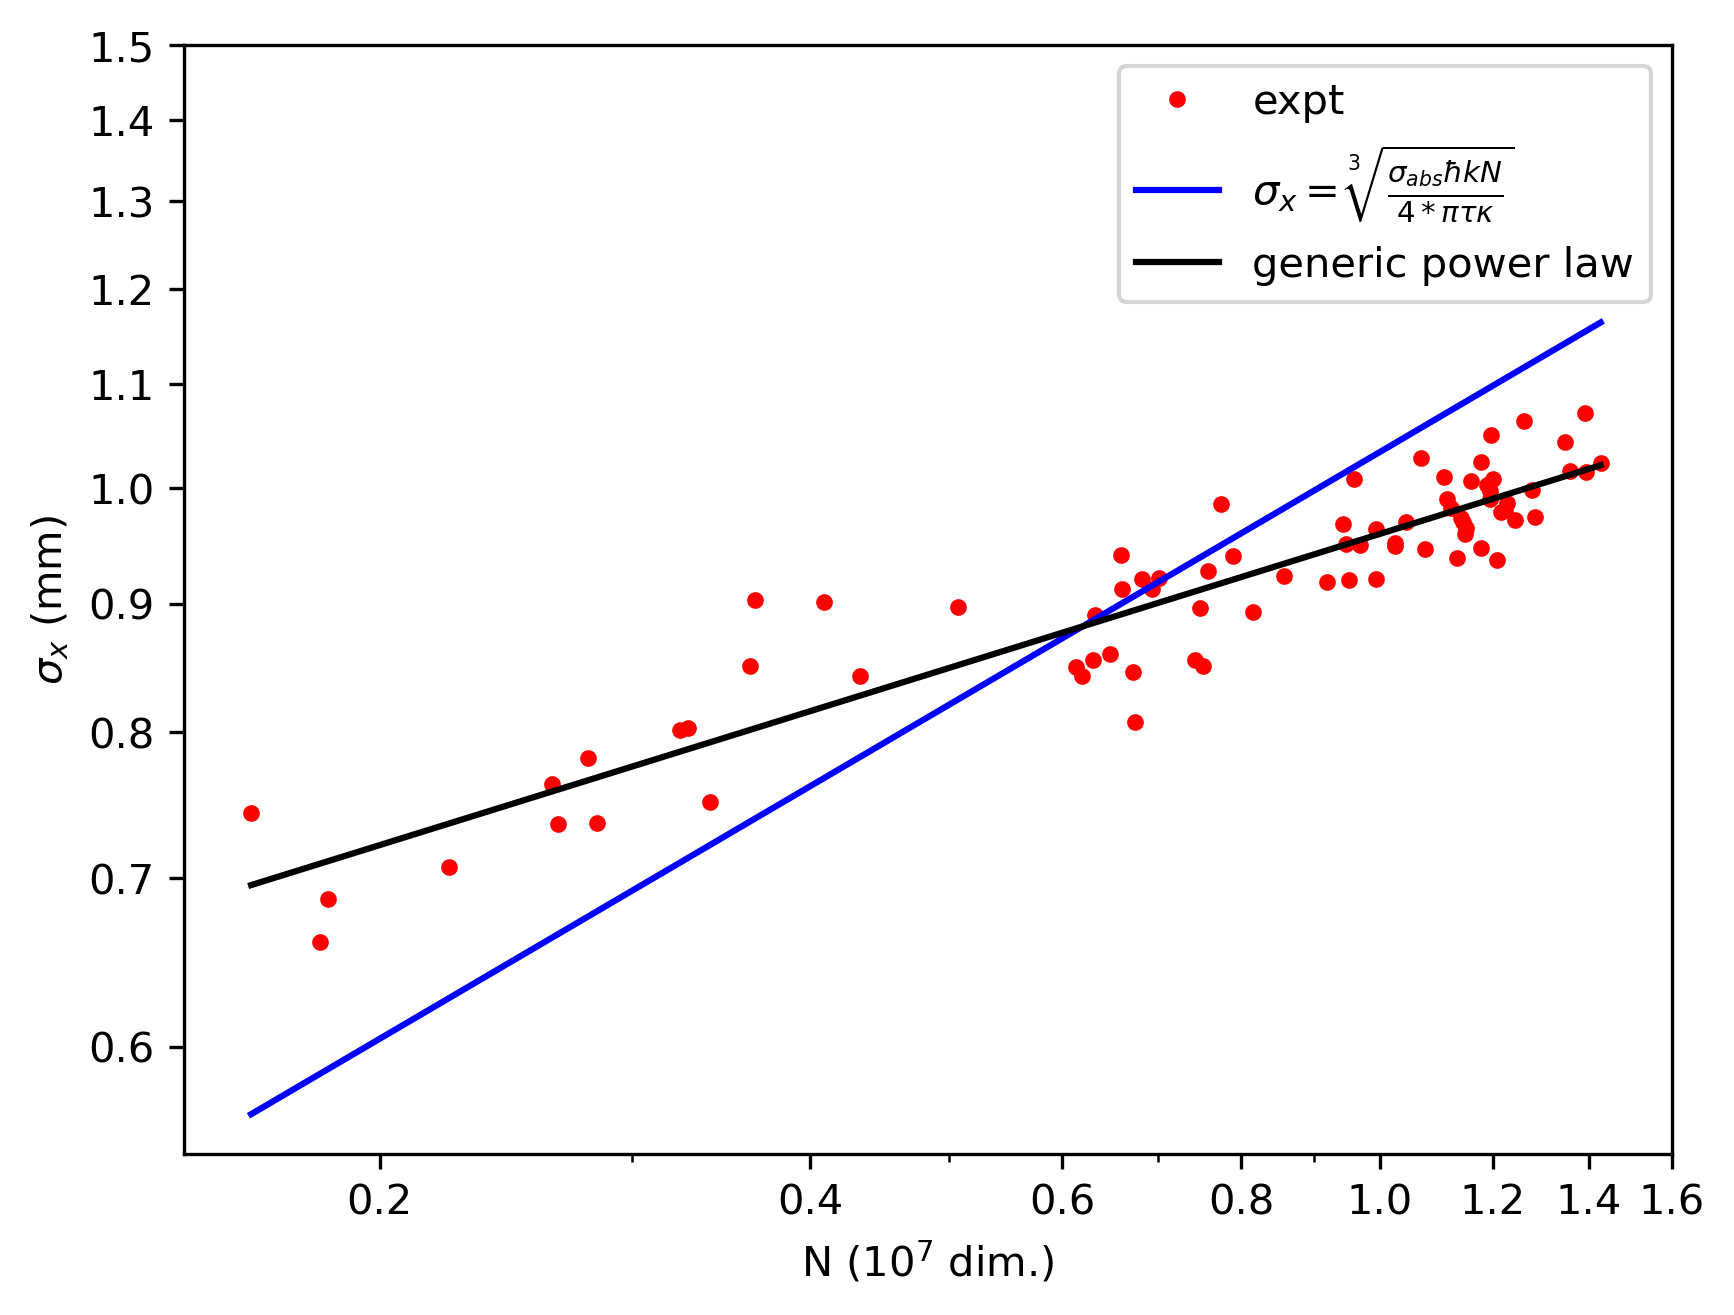

In [88]:
from matplotlib.ticker import ScalarFormatter
from uncertainties import 
numscaling=10**7
# plt.plot([datum.atom_number_px_sum() for datum in d.data],[0.5*(datum.popt_x[2]+datum.popt_y[2])*3*6.45e-3 for datum in d.data],'.r')
#atomnums already divided by 1e7
atomnums=np.array([datum.atom_number_px_sum()/numscaling for datum in d.data])
sigmas=[datum.popt_y[2]*6.45e-3*3 for datum in d.data]
#EXPECTED SIZE OF CLOUD
#rms radius of 7 coils. Scaled from mm to m
a=np.sqrt(np.mean(np.square(np.arange(45.1,70.2,(70.2-50.1)/6))))*1e-3
dist=a/2
n=35
I=5.39
#approximate d. should measure this directly
# d=1.25*a
#calculate field gradient in T/m. Multiply by 100 to get G/cm (conventional units)
u0=4*np.pi*1e-7
def calc_A(a,dist,n,I,u0):
    return 3*u0*I*n*dist*a**2/(dist**2+a**2)**2.5
lambd=766.7*1e-9
k=2*np.pi/lambd
hbar=1.054571817*1e-34
gamma=1/(26.375*1e-9)
I_sat=2*(np.pi)**2*hbar*299792458*gamma/(3*lambd**3)
I_incident=26e-3/(np.pi*(4.5e-3)**2)
dipole=9.2740100783e-24*(4/3*3/2-2.00229421*1/2)
s0=I_incident/I_sat
delta_0=3.34e7
# #factor of 2 accounts for double passing, second factor of 2 is the voltage
# delta_0=2*2*71.66*2*1e6
def calc_kappa():
    A=calc_A(a,dist,n,I,u0)
    print(A)
    return (dipole*A/(hbar*k))*8*hbar*k**2*s0*delta_0/(gamma*(1+s0+4*delta_0**2/gamma**2)**2)
kappa=calc_kappa()
print(kappa)
boltz=1.380649e-23
temp=5e-3
x_rms=np.sqrt(boltz*temp/kappa)*1000
xlinspace=np.linspace(min(atomnums),max(atomnums),10000)
fig,ax=plt.subplots(dpi=300)
ax.plot(atomnums,sigmas,'.r',label='expt')
ax.set_ylabel('$\sigma_x$ (mm)')
ax.set_xlabel('N ($10^7$ dim.)')
# plt.plot(xlinspace/10**7,[x_rms]*10000,'-k',label='non-interacting atoms')
#with repulsion
CS=(766.5e-9)**2/(2*np.pi)
def r_repulse(x):
    #final sqrt(3/5) takes care of the fact that we want to find rms distance, not absolute boundary of blob
    return 1000*(CS*hbar*k*x*gamma/(4*np.pi*kappa))**(1/3)*np.sqrt(3/5)
ylinspace=r_repulse(xlinspace*1e7)
ax.plot(xlinspace,ylinspace,'-b',label=r'$\sigma_x=\sqrt[3]{\frac{\sigma_{abs}\hbar kN}{4*\pi\tau\kappa}}$')

#fitting to a power law
fit_results=linregress(np.log10(atomnums),np.log10(sigmas))
print(fit_results.slope,fit_results.intercept)
ax.plot(xlinspace,np.power(xlinspace,fit_results.slope)*10**fit_results.intercept,'-k',label=r'generic power law')
# print(np.power(xlinspace,fit_results.slope)*fit_results.intercept)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(np.arange(0.2, 1.8, 0.2))
ax.set_yticks(np.arange(0.6, 1.6, 0.1))
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.legend()